### **MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

#### **Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   **NÚMERO DE EQUIPO:**
*     Equipo #83

---        
        
*   **MIEMBROS DEL EQUIPO:**
*     Ernesto Damián Favela Vela: A00738581
*     Gustavo Alejandro Garduño Macedo: A01795341
*     Julia Gabriela Pinedo: A01795315
*     Juan Manuel Rodríguez Mateos: A01794890

---

In [1]:
# Importar Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tabulate import tabulate

In [2]:
# Cargar el DataFrame

cereals_df = pd.read_csv('../data/Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [3]:
# *************************** PARTE 0: Clasificación de estadísticas *****************************

# Opcional: Se creará una función para etiquetar las variables de acuerdo con la categoría a la
# que pertenecen, para visualizarlos en una tabla.

def separate_variables_by_type(df):
    """
    Separar las columnas entre numéricas (dtype= int, float) y cualitativas (dtype= object)

    Args:
        df (DataFrame)

    Returns:
        numeric_df (tabla impresa clasificando a las variables numéricas)
        object_df (tabla impresa clasificando a las variables categóricas)
    """
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    object_columns = df.select_dtypes(include=['object']).columns

    # Se declara una lista vacía, la cual se utilizará para almacenar los datos en el dataframe
    # que se generará
    data_types = []

    # Ciclo "for" obtener los data types de cada una de las columnas
    for col in df.columns:
        if col in numeric_columns:
            data_type = "Numeric" # Etiqueta para el tipo "numérico"
        elif col in object_columns:
            data_type = "Object" # Etiqueta para el tipo "objeto"
        data_types.append((col, data_type)) # Guarda las etiquetas de las columnas en la lista

    # Crea un DataFrame para las columnas numéricas
    numeric_df = pd.DataFrame([i for i in data_types if i[1] == "Numeric"],
                                   columns=["Variable", "Categoría"])
    # Crea un DataFrame para las columnas de texto
    object_df = pd.DataFrame([i for i in data_types if i[1] == "Object"],
                                  columns=["Variable", "Categoría"])

    # Imprimir las tablas con los datos
    print('Columnas del tipo "Numeric":')
    print(tabulate(numeric_df, headers="keys", tablefmt="psql", showindex=True))
    print('\n\n')
    print('Columnas del tipo "Object":')
    print(tabulate(object_df, headers="keys", tablefmt="psql", showindex=True))

In [4]:
# Se imprimen las columnas separadas por categoría.

columns_separated = separate_variables_by_type(df=cereals_df)

Columnas del tipo "Numeric":
+----+------------+-------------+
|    | Variable   | Categoría   |
|----+------------+-------------|
|  0 | calories   | Numeric     |
|  1 | protein    | Numeric     |
|  2 | fat        | Numeric     |
|  3 | sodium     | Numeric     |
|  4 | fiber      | Numeric     |
|  5 | carbo      | Numeric     |
|  6 | sugars     | Numeric     |
|  7 | potass     | Numeric     |
|  8 | vitamins   | Numeric     |
|  9 | shelf      | Numeric     |
| 10 | weight     | Numeric     |
| 11 | cups       | Numeric     |
| 12 | rating     | Numeric     |
+----+------------+-------------+



Columnas del tipo "Object":
+----+------------+-------------+
|    | Variable   | Categoría   |
|----+------------+-------------|
|  0 | name       | Object      |
|  1 | mfr        | Object      |
|  2 | type       | Object      |
+----+------------+-------------+


In [5]:
# ****************************** PARTE 1: Resumen de estadísticas ********************************

"""Estadísticas descriptivas para las variables numéricas del DataFrame"""

# Se declara la función ".describe()" para obtener los datos estadísticos de las columnas que
# se clasificaron como "numéricas".

numeric_columns = cereals_df.select_dtypes(include=['int', 'float']).columns

numerical_summary = cereals_df[numeric_columns].describe()
numerical_summary.T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [6]:
"""Estadísticas descriptivas para las variables numéricas del DataFrame"""

# Se obtienen los datos estadísticos de las columnas clasificadas como "categóricas".

object_columns = cereals_df.select_dtypes(include=['object']).columns

object_summary = cereals_df[object_columns].describe()
object_summary.T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


In [7]:
# NOTA: A pesar de que la variable "shelf" se clasificó como una variable numérica, esta en
# realidad una variable cualitativa ordinal, debido a que clasifica el estante donde se
# encuentra exhibido el cereal (contando desde el piso). En puntos posteriores, se le dará
# el tratamiento correspondiente al tipo de variable.

In [8]:
"""Ejemplo de estadísticas descriptivas obtenidas para la variable: shelf"""

# Copia del DF original para no afectarlo.
cereals_df_copy = cereals_df.copy()

# Nombrar las categorías y reemplazarlas en el DF copia
shelf_categories = {1: 'Shelf level 1', 2: 'Shelf level 2', 3: 'Shelf level 3'}
cereals_df_copy['shelf'] = cereals_df_copy['shelf'].map(shelf_categories)

# Obtener estadísticas descriptivas
shelf_description = cereals_df_copy['shelf'].describe()
shelf_description.T

count                77
unique                3
top       Shelf level 3
freq                 36
Name: shelf, dtype: object

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

In [9]:
def plot_categorial(df,col_name):
    res = cereals_df_copy[col_name].value_counts().sort_values(ascending = False)
    print(res.head(n = 10))
    res.plot(kind='bar')

shelf
Shelf level 3    36
Shelf level 2    21
Shelf level 1    20
Name: count, dtype: int64


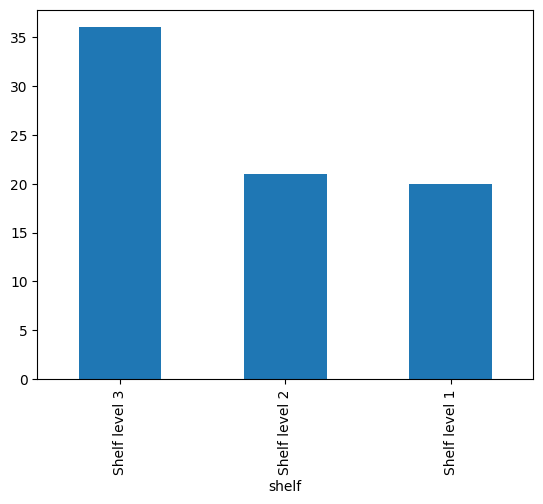

In [10]:
plot_categorial(df=cereals_df_copy,col_name='shelf')

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64


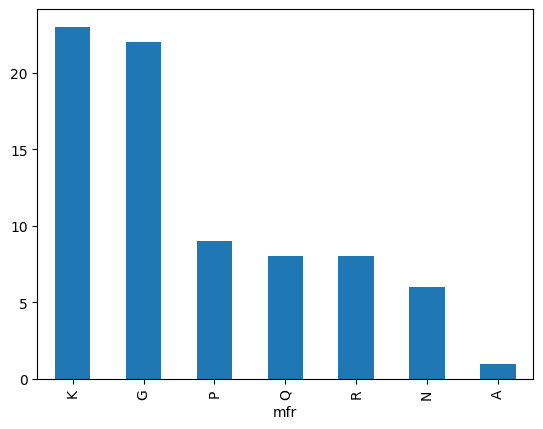

In [11]:
plot_categorial(df=cereals_df_copy,col_name='mfr')

- Para la variable `shelf` la categoría con mayor prescencia en el conjunto de datos es el nivel 3 con 36 observaciones. Seguido del nivel 2 con 21 observaciones y nivel 3 con 20 observaciones.
- Respecto a la variable `mfr` el grupo con mayor numero de observaciones es fabricante K (Kellogs) con 33 observaciones, seguido de G (General Mills) con 22. El resto de los grupos presentan un numero menor de observaciones a comparación de los primeros. Esta es una variable mas imbalanceada que `shelf`

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

In [12]:
shelf_by_mfr = cereals_df_copy.groupby(['shelf','mfr']).size().unstack()
shelf_by_mfr

mfr,A,G,K,N,P,Q,R
shelf,,,,,,,
Shelf level 1,NaN,6.0,4.0,3.0,2.0,1.0,4.0
Shelf level 2,1.0,7.0,7.0,2.0,1.0,3.0,NaN
Shelf level 3,NaN,9.0,12.0,1.0,6.0,4.0,4.0


<Axes: xlabel='shelf'>

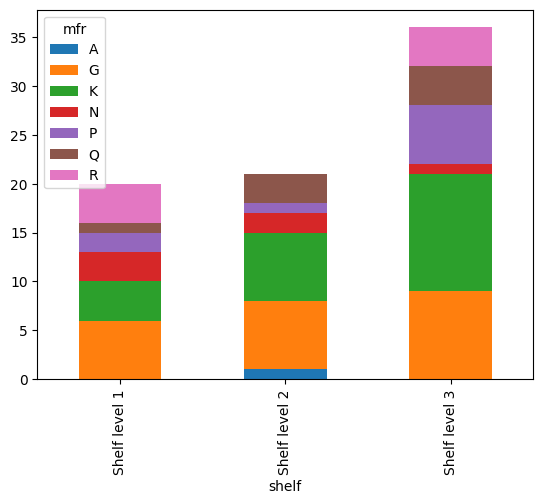

In [13]:
shelf_by_mfr.plot(kind='bar',stacked=True)

- Todos los estantes predomínan los fabricantes Kellogs y General Mills en mayor porcentaje. Aparentemente el estante mejor diribuído es el estante uno.

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

<Axes: title={'center': 'Histograma de ratings'}, ylabel='Frequency'>

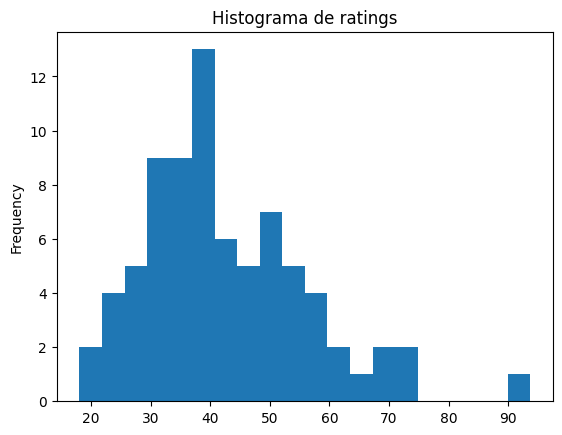

In [14]:
cereals_df_copy['rating'].plot(kind='hist',bins=20
                               ,title='Histograma de ratings')

- El rango con más frecuencia de la variable rating se encuentra de 35 a 40.

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [15]:
cereals_df.sort_values(by='rating',ascending=False)[['name','mfr','rating']].head(n=10)

,name,mfr,rating
3,All-Bran_with_Extra_Fiber,K,93.704912
64,Shredded_Wheat_'n'Bran,N,74.472949
65,Shredded_Wheat_spoon_size,N,72.801787
0,100%_Bran,N,68.402973
63,Shredded_Wheat,N,68.235885
20,Cream_of_Wheat_(Quick),N,64.533816
55,Puffed_Wheat,Q,63.005645
54,Puffed_Rice,Q,60.756112
50,Nutri-grain_Wheat,K,59.642837
2,All-Bran,K,59.425505


- El cereal mejor evaluado es All-Bran con fibra extra de Kellogs con un rating de 93.7, seguido de Shredded wheat Bran de Nabisco.

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

<Axes: xlabel='mfr', ylabel='calories'>

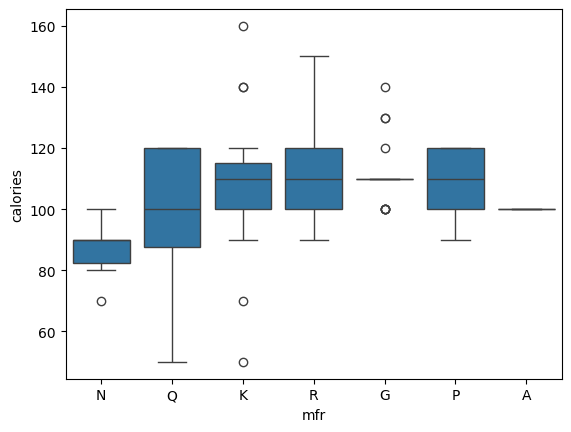

In [16]:
sns.boxplot(x = 'mfr', y = 'calories', data = cereals_df)

- Los fabricantes con una mediana de calorías mas baja son Nabisco seguido de Quaker Oats. El resto de marcas parece que comparten un valor de la mediana similar.

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

<Axes: >

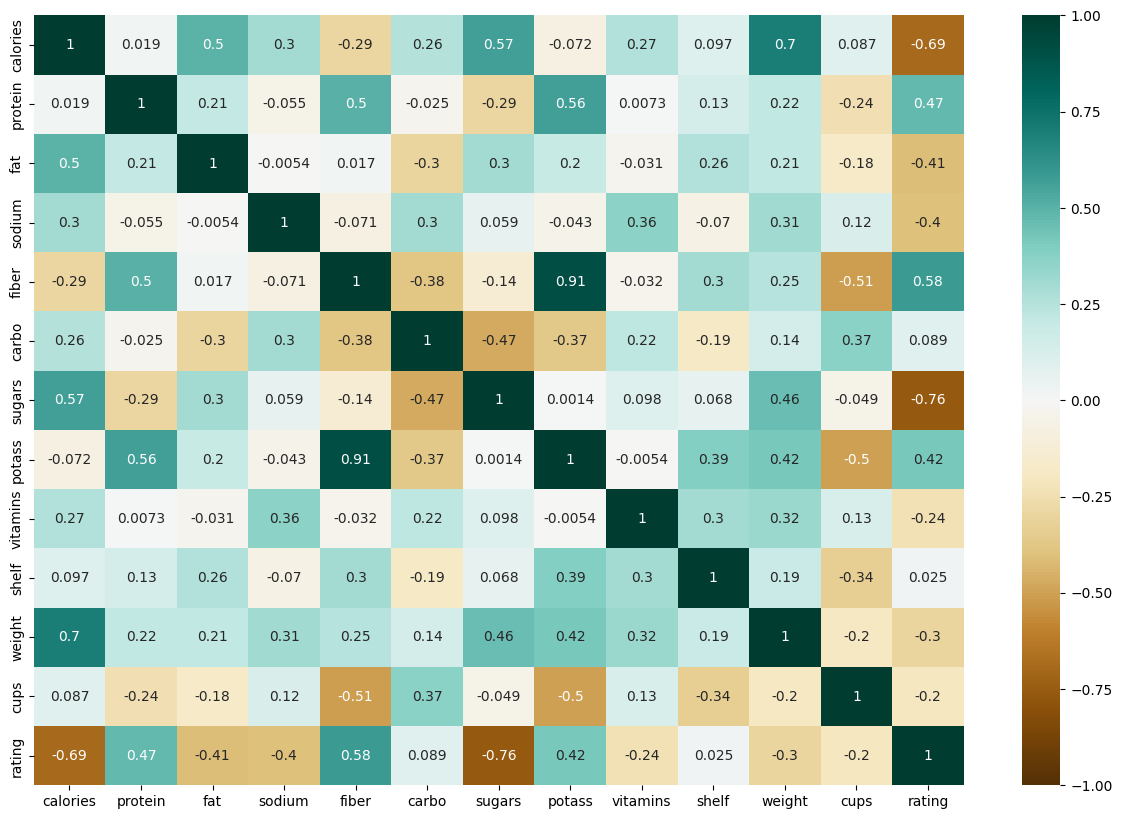

In [17]:
numeric_columns = cereals_df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(15,10))
sns.heatmap(cereals_df[numeric_columns].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

- Las variables que tienen mas correlación con rating son: 
  - Calories: -0.69
  - Sugars: -0.76
  - Fiber: 0.6
  - Protein: 0.47
  - Potass: 0.42

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [18]:
# ************************** PARTE 0: Porcentaje de Valores Faltantes ****************************

# Opcional: Se creará una función para obtener automáticamente el porcentaje de valores faltantes
# por cada variable del DataFrame.

def find_missing_values_per_column(df):
    """
    Obtener el porcentaje de valores faltantes por columna e imprimirlo en una tabla

    Args:
        df (DataFrame)

    Returns:
        df_missing (tabla impresa con los porcentajes de valores faltantes por columna)
    """
    missing_percentage = df.isna().sum() * 100 / len(df)

    # Guardar en un DataFrame para su impresión en una tabla

    df_missing = pd.DataFrame({
        'Columna': df.columns,
        'Porcentaje Faltantes': missing_percentage.astype(str) + '%'
        # Imprime el valor con el símbolo "%"
    })

    # Imprimir una tabla con los datos
    print(tabulate(df_missing, headers='keys', tablefmt='psql', showindex=False))

In [19]:
# Se imprime la tabla de valores faltantes.

missing_values = find_missing_values_per_column(df=cereals_df)

+-----------+------------------------+
| Columna   | Porcentaje Faltantes   |
|-----------+------------------------|
| name      | 0.0%                   |
| mfr       | 0.0%                   |
| type      | 0.0%                   |
| calories  | 0.0%                   |
| protein   | 0.0%                   |
| fat       | 0.0%                   |
| sodium    | 0.0%                   |
| fiber     | 0.0%                   |
| carbo     | 1.2987012987012987%    |
| sugars    | 1.2987012987012987%    |
| potass    | 2.5974025974025974%    |
| vitamins  | 0.0%                   |
| shelf     | 0.0%                   |
| weight    | 0.0%                   |
| cups      | 0.0%                   |
| rating    | 0.0%                   |
+-----------+------------------------+


In [20]:
# Se observa que las columnas que tienen un porcentaje de valores faltantes son: carbo, sugars y
# potass. Se guardarán en la lista "columns_with_missing_values" para eliminar los registros que
# contengan valores faltantes en dichas columnas.

# ************************** PARTE 1: Eliminación de Valores Faltantes ***************************

columns_with_missing_values = ['carbo', 'sugars', 'potass']

# Eliminar valores faltantes.
cereals_df = cereals_df.dropna(subset=columns_with_missing_values)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [21]:
# Se reinicia el índice del DataFrame para mantener la continuidad entre las columnas

cereals_df = cereals_df.reset_index(drop=True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [22]:
# Se vuelve a imprimir la tabla de valores faltantes para comprobar que la operación
# se realizó correctamente

missing_values_after_drop = find_missing_values_per_column(df=cereals_df)

+-----------+------------------------+
| Columna   | Porcentaje Faltantes   |
|-----------+------------------------|
| name      | 0.0%                   |
| mfr       | 0.0%                   |
| type      | 0.0%                   |
| calories  | 0.0%                   |
| protein   | 0.0%                   |
| fat       | 0.0%                   |
| sodium    | 0.0%                   |
| fiber     | 0.0%                   |
| carbo     | 0.0%                   |
| sugars    | 0.0%                   |
| potass    | 0.0%                   |
| vitamins  | 0.0%                   |
| shelf     | 0.0%                   |
| weight    | 0.0%                   |
| cups      | 0.0%                   |
| rating    | 0.0%                   |
+-----------+------------------------+


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [23]:
Y = cereals_df['rating']
X = cereals_df[numeric_columns]

In [24]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(X)

In [26]:
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pd.DataFrame(pca.fit_transform(x))

In [29]:
principal_components.head(n=5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,5.746995,-1.187545,-0.983893,0.421067,-1.176490,-0.972466,-0.223206,-0.243515,-0.135080,0.049433,0.250305,0.010701,1.022141e-08
1,0.411657,-1.869310,-2.901420,-0.858535,3.271532,-0.681940,-0.962611,0.903571,-0.841989,-0.594658,0.067248,-0.094692,1.651188e-09
2,5.167720,-1.504111,-0.102637,0.169396,-1.559672,-1.996801,0.415834,0.186687,0.140228,0.084262,-0.517210,-0.014985,1.473264e-08
3,7.856202,0.241896,0.676601,0.467311,-1.770340,-0.781378,-0.698801,0.869826,-0.685784,0.107987,0.738824,0.076199,-1.928351e-08
4,-1.039034,-0.365354,-1.466490,-0.909753,-0.407840,-0.896077,-0.006820,-0.794098,-0.744350,-0.098973,0.099616,-0.080442,1.728972e-08


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.